# Trained Model Visualization

Run this notebook to visualize models trained by [Training.ipynb](Training.ipynb)

Please first select the **language** for which you want to visualize the trained library embeddings. More configuration options are available in the config section below.

In [1]:
%matplotlib notebook
import gzip
import json
import numpy as np
import seaborn as sns

from itertools import cycle
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from gensim.models.keyedvectors import KeyedVectors
from sklearn.cluster import OPTICS, cluster_optics_dbscan

sns.set_style('darkgrid')

## CONFIGURATION

In [2]:
dim = 100
language = 'python'
rootDir = '../datasets/' + language + '/models/'
vectors = '../datasets/{}/models/w2v_dim{}.txt.gz'.format(language, dim)

## LOAD DATA

Update parameter language to visualize a different model. Leave the rest untouched.

In [3]:
filename = rootDir + 'vectorsHD_dim{}.json.gz'.format(dim)
with gzip.open(filename, 'r') as f:
    d = json.loads(f.read())

In [4]:
embeddings = [item[1] for item in d.items()]
labels = [item[0] for item in d.items()]

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(labels)
one_hot_labels = label_encoder.transform(labels)
print(f"Example:\nLabel - {labels[:1]}\nEmbedding - {embeddings[:1]}")

Example:
Label - ['time']
Embedding - [[-0.0019434383139014244, 0.023900559172034264, 0.04114663973450661, 0.015054294839501381, -0.03058125637471676, -0.015115109272301197, 0.05392461642622948, -0.05987263470888138, -0.02953716181218624, -0.04024821147322655, -0.016197336837649345, 0.05616127699613571, -0.09991537034511566, -0.03590279072523117, 0.06628508120775223, -0.03349927067756653, 0.05726376548409462, -0.06893034279346466, -0.02812369167804718, 0.0132208950817585, 0.03971201181411743, -0.031188124790787697, 0.038787227123975754, 0.040612224489450455, -0.052646175026893616, -0.012267989106476307, 0.027723154053092003, -0.018370524048805237, -0.039363544434309006, 0.09585146605968475, -0.0336039699614048, -0.04616102576255798, 0.03764713183045387, 0.033099979162216187, 0.10468237847089767, 0.016963450238108635, -0.0258644986897707, 0.07276499271392822, 0.031007181853055954, -0.0245572030544281, -0.026846254244446754, 0.0020950264297425747, -0.008108016103506088, 0.010653527453541

In [5]:
w2v = KeyedVectors.load_word2vec_format(vectors, binary=False)
vocab = w2v.vocab.keys()
print(len(vocab), "vectors loaded")

# prints libraries in your model having 'name' as a substring
def find_library(name):
    result = []
    for l in vocab:
        if name in l:
            result.append(l)
    return result

609 vectors loaded


## EVALUATE SIMILARITIES

In [6]:
find_library('nltk')

['nltk']

In [7]:
w2v.most_similar(['numpy'], topn=10)

[('time', 0.19749905169010162),
 ('sys', 0.1816667914390564),
 ('collections', 0.12538166344165802),
 ('os', 0.11188966035842896),
 ('re', -0.0067230574786663055),
 ('random', -0.11425449699163437),
 ('tempfile', -0.1320401132106781),
 ('vgg', -0.13372041285037994),
 ('json', -0.15269029140472412),
 ('shutil', -0.15956202149391174)]

In [8]:
w2v.most_similar(['nltk'], topn=10)

[('onnxruntime', 0.8232625722885132),
 ('main', 0.8123600482940674),
 ('hmac', 0.8119906187057495),
 ('jinja2', 0.8101279735565186),
 ('focal_loss', 0.8092048168182373),
 ('strategy', 0.8086695075035095),
 ('decimal', 0.8079326748847961),
 ('convert', 0.8059747219085693),
 ('sysconfig', 0.8050132989883423),
 ('libinfo', 0.8049750328063965)]

In [9]:
print(f"tf-keras similarity: {w2v.similarity('tensorflow', 'keras')}")
print(f"keras-torch similarity: {w2v.similarity('keras', 'torch')}")

tf-keras similarity: 0.10322576016187668
keras-torch similarity: 0.19894039630889893


In [10]:
# Analogies
w2v.most_similar(positive=['torch'],negative=['keras'])

[('tensorflow', 0.4529545307159424),
 ('scipy', 0.26129966974258423),
 ('mxnet', 0.2584332823753357),
 ('exceptions', 0.25635889172554016),
 ('configparser', 0.25329384207725525),
 ('glob', 0.25203996896743774),
 ('s3', 0.2506905794143677),
 ('urlparse', 0.23907354474067688),
 ('pipeline', 0.23429261147975922),
 ('concurrent', 0.21510905027389526)]

## Visualize using PCA and  t-SNE

Cumulative explained variation for 100 principal components: 1.000


<IPython.core.display.Javascript object>


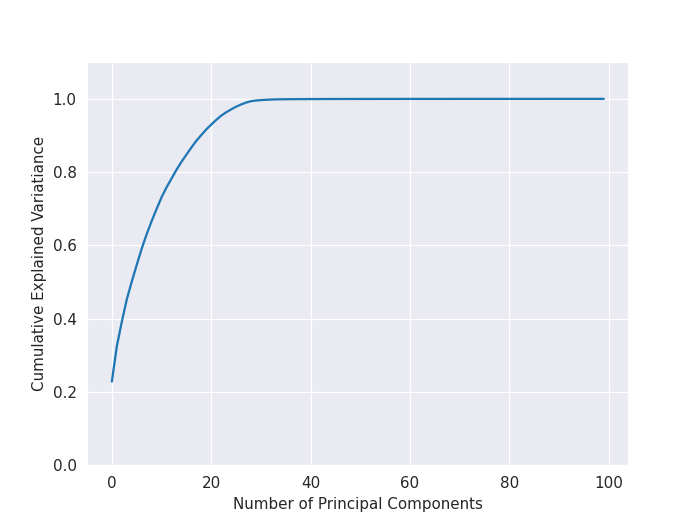

Text(0.5, 0, 'Number of Principal Components')

In [16]:
#pca
pca = PCA(n_components=100)
pca_result = pca.fit_transform(embeddings)

print(f"Cumulative explained variation for {len(pca.explained_variance_ratio_)} principal components: {np.sum(pca.explained_variance_ratio_):.3f}")
plt.figure()
plt.plot(np.arange(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.ylim([0, 1.1])
plt.ylabel('Cumulative Explained Variatiance')
plt.xlabel('Number of Principal Components')

In [66]:
#t-sne
perplexity = 50
tsne2d = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=3000, verbose=1)
tsne_result_2d = tsne2d.fit_transform(embeddings)

tsne3d = TSNE(n_components=3, random_state=0, perplexity=perplexity, n_iter=3000, verbose=1)
tsne_result_3d = tsne3d.fit_transform(embeddings)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 609 samples in 0.000s...
[t-SNE] Computed neighbors for 609 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 609 / 609
[t-SNE] Mean sigma: 0.116985
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.334389
[t-SNE] KL divergence after 1550 iterations: 0.699813
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 609 samples in 0.000s...
[t-SNE] Computed neighbors for 609 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 609 / 609
[t-SNE] Mean sigma: 0.116985
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.611938
[t-SNE] KL divergence after 3000 iterations: 1.148017


<IPython.core.display.Javascript object>


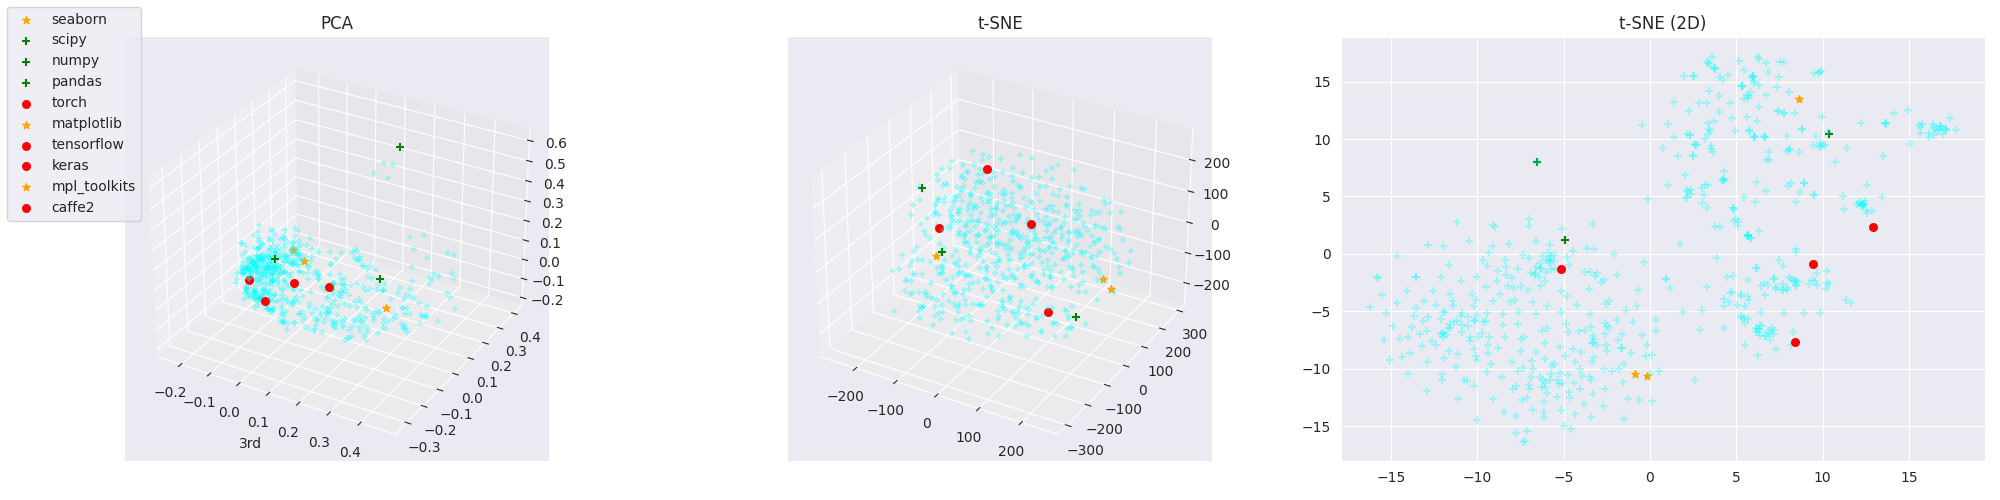

In [67]:
highlighted_labels_dict = {'tensorflow': ['o','r'], 'keras': ['o','r'], 'torch': ['o','r'], 'caffe2': ['o','r'], 'scipy': ['+','g'], 'numpy': ['+','g'], 'pandas': ['+','g'], 'matplotlib': ['*','orange'], 'seaborn': ['*','orange'], 'mpl_toolkits': ['*','orange']}
highlighted_labels = highlighted_labels_dict.keys()

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('PCA')
for (x, y, z, label) in zip(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], labels):
    if label in highlighted_labels:
        ax1.scatter(x, y, z, marker=highlighted_labels_dict[label][0], c=highlighted_labels_dict[label][1], s=30, label=label)
    else:
        ax1.scatter(x, y, z, marker='+', c='cyan', alpha=0.3)

ax1.set_xlabel('1st')
ax1.set_xlabel('2nd')
ax1.set_xlabel('3rd')
        
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('t-SNE')
for (x, y, z, label) in zip(tsne_result_3d[:, 0], tsne_result_3d[:, 1], tsne_result_3d[:, 2], labels):
    if label in highlighted_labels:
        ax2.scatter(x, y, z, marker=highlighted_labels_dict[label][0], c=highlighted_labels_dict[label][1], s=30, label=label)
    else:
        ax2.scatter(x, y, z, marker='+', c='cyan', alpha=0.3)

ax3 = fig.add_subplot(133)
ax3.set_title('t-SNE (2D)')
for (x, y, label) in zip(tsne_result_2d[:, 0], tsne_result_2d[:, 1], labels):
    if label in highlighted_labels:
        ax3.scatter(x, y, marker=highlighted_labels_dict[label][0], c=highlighted_labels_dict[label][1], s=30, label=label)
    else:
        ax3.scatter(x, y, marker='+', c='cyan', alpha=0.3)
        
plt.tight_layout()
handles, l = ax1.get_legend_handles_labels()
fig.legend(handles, l, bbox_to_anchor=(0.0, 1.0), loc='upper left')

# Clustering

In [68]:
# Apply OPTICS algorithm
eps = [0.1, 0.5]
model = OPTICS(cluster_method='xi', min_samples=5, metric='cosine')
model.fit(embeddings)

labels_eps0 = cluster_optics_dbscan(reachability=model.reachability_,
                                   core_distances=model.core_distances_,
                                   ordering=model.ordering_, eps=eps[0])
labels_eps1 = cluster_optics_dbscan(reachability=model.reachability_,
                                   core_distances=model.core_distances_,
                                   ordering=model.ordering_, eps=eps[1])


space = np.arange(len(embeddings))
reachability = model.reachability_[model.ordering_]
optics_labels = model.labels_[model.ordering_]


print(f'{"-"*10} METRICS FOR OPTICS {"-"*10}')
print('Number of clusters: %d' % len(model.cluster_hierarchy_))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(one_hot_labels, optics_labels))
print("Completeness: %0.3f" % metrics.completeness_score(one_hot_labels, optics_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(one_hot_labels, optics_labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(one_hot_labels, optics_labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(one_hot_labels, optics_labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(embeddings, optics_labels, metric='cosine'))

print(f'{"-"*10} METRICS FOR DBSCAN EPS {eps[0]} {"-"*10}')
print('Number of clusters: %d' % len(np.unique(labels_eps0)))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(one_hot_labels, labels_eps0))
print("Completeness: %0.3f" % metrics.completeness_score(one_hot_labels, labels_eps0))
print("V-measure: %0.3f" % metrics.v_measure_score(one_hot_labels, labels_eps0))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(one_hot_labels, labels_eps0))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(one_hot_labels, labels_eps0))
if (len(np.unique(labels_eps0[labels_eps0 > -1])) > 1):
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(embeddings, labels_eps0, metric='cosine'))

print(f'{"-"*10} METRICS FOR DBSCAN EPS {eps[1]} {"-"*10}')
print('Number of clusters: %d' % len(np.unique(labels_eps1[labels_eps1 > -1])))
print("Homogeneity: %0.3f" % metrics.homogeneity_score(one_hot_labels, labels_eps1))
print("Completeness: %0.3f" % metrics.completeness_score(one_hot_labels, labels_eps1))
print("V-measure: %0.3f" % metrics.v_measure_score(one_hot_labels, labels_eps1))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(one_hot_labels, labels_eps1))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(one_hot_labels, labels_eps1))
if (len(np.unique(labels_eps1[labels_eps1 > -1])) > 1):
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(embeddings, labels_eps1, metric='cosine'))

---------- METRICS FOR OPTICS ----------
Number of clusters: 33
Homogeneity: 0.210
Completeness: 1.000
V-measure: 0.347
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: -0.360
---------- METRICS FOR DBSCAN EPS 0.1 ----------
Number of clusters: 5
Homogeneity: 0.147
Completeness: 1.000
V-measure: 0.256
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.097
---------- METRICS FOR DBSCAN EPS 0.5 ----------
Number of clusters: 1
Homogeneity: 0.007
Completeness: 1.000
V-measure: 0.015
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


## Visualize computed clusters with PCA

<IPython.core.display.Javascript object>


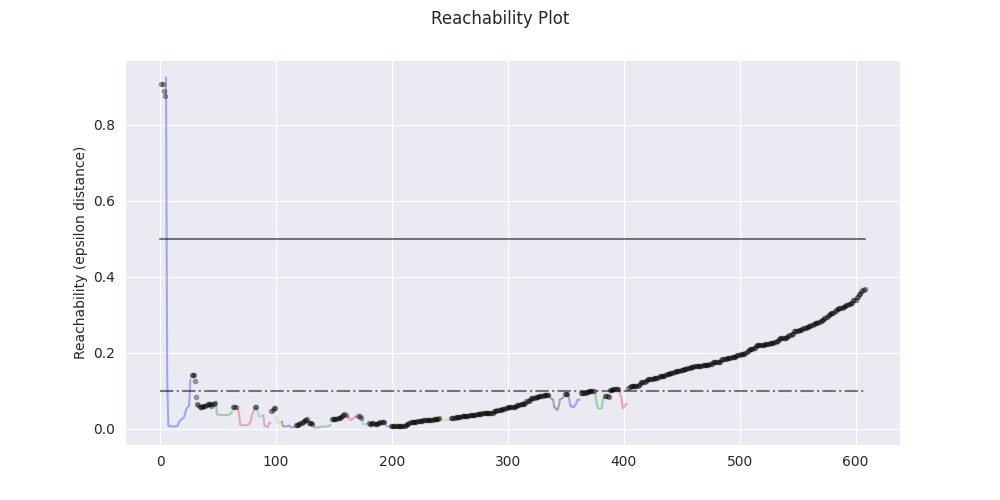

<IPython.core.display.Javascript object>


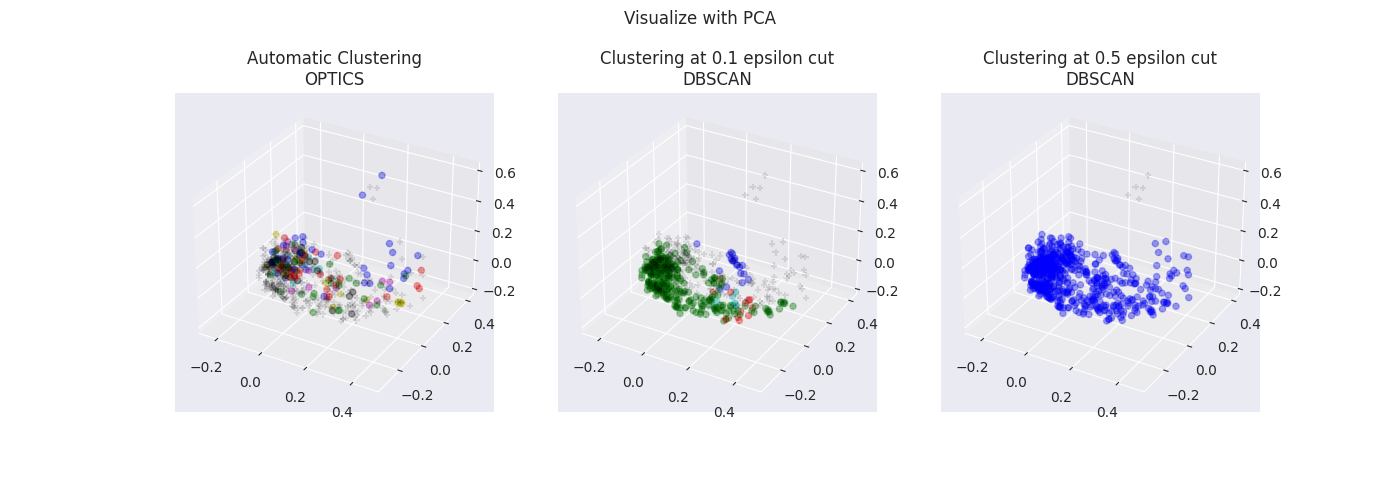

In [76]:
plt.figure(figsize=(10, 5))
# Reachability plot
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for klass, color in zip(range(0, len(model.cluster_hierarchy_)), colors):
    Xk = space[optics_labels == klass]
    Rk = reachability[optics_labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(space[optics_labels == -1], reachability[optics_labels == -1], 'k.', alpha=0.3)
plt.plot(space, np.full_like(space, eps[0], dtype=float), 'k-.', alpha=0.5)
plt.plot(space, np.full_like(space, eps[1], dtype=float), 'k-', alpha=0.5)
plt.ylabel('Reachability (epsilon distance)')
plt.suptitle('Reachability Plot')

# Scatter plots
fig = plt.figure(figsize=(14, 5))
fig.suptitle('Visualize with PCA')
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('Automatic Clustering\nOPTICS')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], marker='+', c='k', alpha=0.1)
for klass, color in zip(range(0, len(model.cluster_hierarchy_)), colors):
    Xk = pca_result[optics_labels == klass]
    ax1.scatter(Xk[:, 0], Xk[:, 1], Xk[:, 2], c=color, alpha=0.3)
    
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title(f'Clustering at {eps[0]} epsilon cut\nDBSCAN')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
ax2.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], marker='+', c='k', alpha=0.1)
for klass, color in zip(range(0, len(np.unique(labels_eps0))), colors):
    Xk = pca_result[labels_eps0 == klass]
    ax2.scatter(Xk[:, 0], Xk[:, 1], Xk[:, 2], c=color, alpha=0.3)
    

ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title(f'Clustering at {eps[1]} epsilon cut\nDBSCAN')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
ax3.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], marker='+', c='k', alpha=0.1)
for klass, color in zip(range(0, len(np.unique(labels_eps1))), colors):
    Xk = pca_result[labels_eps1 == klass]
    ax3.scatter(Xk[:, 0], Xk[:, 1], Xk[:, 2], c=color, alpha=0.3)

## Visualize computed clusters with t-SNE (3D)

<IPython.core.display.Javascript object>


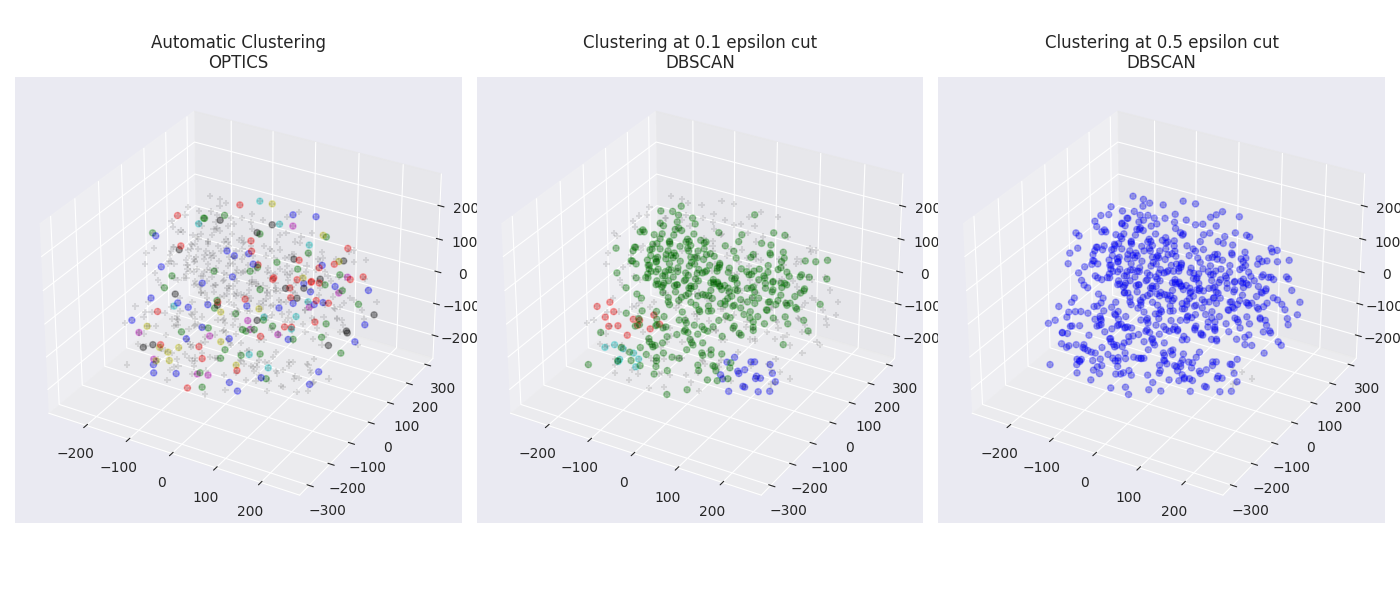

In [78]:
# Scatter plots
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title('Automatic Clustering\nOPTICS')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
ax1.scatter(tsne_result_3d[:, 0], tsne_result_3d[:, 1], tsne_result_3d[:, 2], marker='+', c='k', alpha=0.1)
for klass, color in zip(range(0, len(model.cluster_hierarchy_)), colors):
    Xk = tsne_result_3d[optics_labels == klass]
    ax1.scatter(Xk[:, 0], Xk[:, 1], Xk[:, 2], c=color, alpha=0.3)

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title(f'Clustering at {eps[0]} epsilon cut\nDBSCAN')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
ax2.scatter(tsne_result_3d[:, 0], tsne_result_3d[:, 1], tsne_result_3d[:, 2], marker='+', c='k', alpha=0.1)
for klass, color in zip(range(0, len(np.unique(labels_eps0))), colors):
    Xk = tsne_result_3d[labels_eps0 == klass]
    ax2.scatter(Xk[:, 0], Xk[:, 1], Xk[:, 2], c=color, alpha=0.3)
    

ax3 = fig.add_subplot(133, projection='3d')
ax3.set_title(f'Clustering at {eps[1]} epsilon cut\nDBSCAN')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
ax3.scatter(tsne_result_3d[:, 0], tsne_result_3d[:, 1], tsne_result_3d[:, 2], marker='+', c='k', alpha=0.1)
for klass, color in zip(range(0, len(np.unique(labels_eps1))), colors):
    Xk = tsne_result_3d[labels_eps1 == klass]
    ax3.scatter(Xk[:, 0], Xk[:, 1], Xk[:, 2], c=color, alpha=0.3)

plt.tight_layout()

## Visualize with computed clusters t-SNE (2D)

<IPython.core.display.Javascript object>


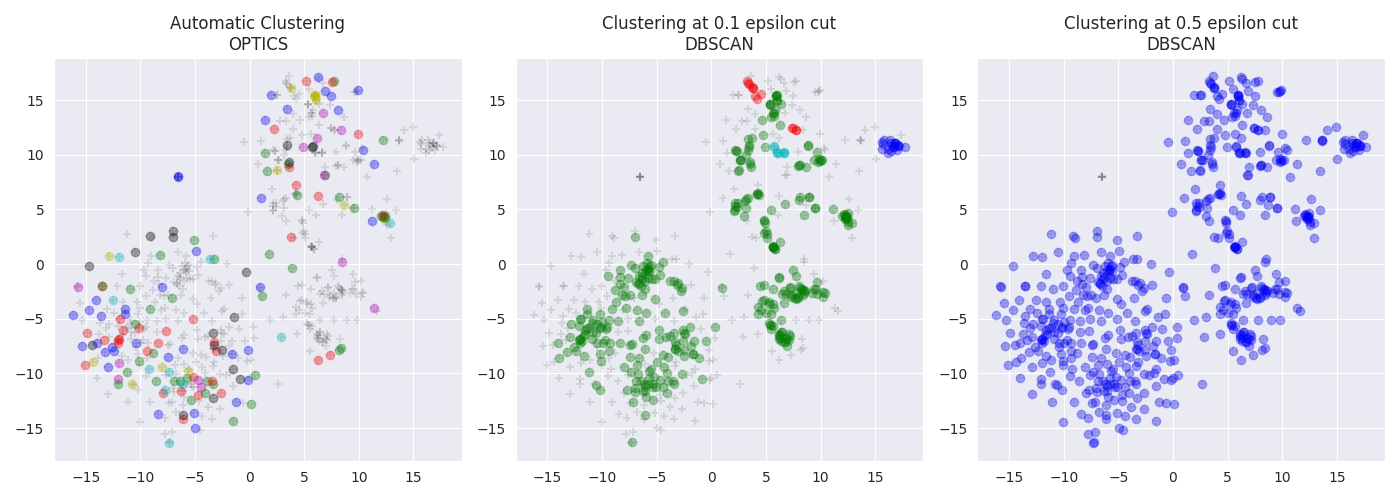

In [80]:
# Scatter plots
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(131)
ax1.set_title('Automatic Clustering\nOPTICS')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
ax1.scatter(tsne_result_2d[:, 0], tsne_result_2d[:, 1], marker='+', c='k', alpha=0.1)
for klass, color in zip(range(0, len(model.cluster_hierarchy_)), colors):
    Xk = tsne_result_2d[optics_labels == klass]
    ax1.scatter(Xk[:, 0], Xk[:, 1], c=color, alpha=0.3)

ax2 = fig.add_subplot(132)
ax2.set_title(f'Clustering at {eps[0]} epsilon cut\nDBSCAN')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
ax2.scatter(tsne_result_2d[:, 0], tsne_result_2d[:, 1], marker='+', c='k', alpha=0.1)
for klass, color in zip(range(0, len(np.unique(labels_eps0))), colors):
    Xk = tsne_result_2d[labels_eps0 == klass]
    ax2.scatter(Xk[:, 0], Xk[:, 1], c=color, alpha=0.3)
    

ax3 = fig.add_subplot(133)
ax3.set_title(f'Clustering at {eps[1]} epsilon cut\nDBSCAN')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
ax3.scatter(tsne_result_2d[:, 0], tsne_result_2d[:, 1], marker='+', c='k', alpha=0.1)
for klass, color in zip(range(0, len(np.unique(labels_eps1))), colors):
    Xk = tsne_result_2d[labels_eps1 == klass]
    ax3.scatter(Xk[:, 0], Xk[:, 1], c=color, alpha=0.3)

plt.tight_layout()